In [28]:
import requests
import json
import pandas as pd
import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt


## 영화 일별 관객수 시각화 

### Kobis 일별 박스오피스 API
https://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do

In [45]:
def get_extract_range(startDt, period):
    f = "%Y%m%d"
    start_date = datetime.datetime.strptime(startDt, f)
    extract_range = []
    for days in range(period):
        extract_date = start_date + datetime.timedelta(days=days)
        if extract_date < datetime.datetime.now():
            extract_date = extract_date.strftime(f)
            extract_range.append(extract_date)
        else:
            breakpoint
    return extract_range

def request_BoxOffice(targetDt):
    url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json"
    params = {
        "key": "key",
        "targetDt": targetDt
    }    
    while True:
        try:
            response = requests.get(url, params=params)
            text = response.text
            loads = json.loads(text)
            df = pd.DataFrame(loads["boxOfficeResult"]["dailyBoxOfficeList"])
        except:
            continue
        break
    return df

def get_BoxOffice(startDt, period):
    extract_range = get_extract_range(startDt, period)
    boxoffice_df = pd.DataFrame()
    for extract_date in tqdm(extract_range):
        df = request_BoxOffice(extract_date)
        df["targetDt"] = extract_date[:4] + "-" + extract_date[4:6] + "-" + extract_date[6:]
        boxoffice_df = pd.concat([boxoffice_df, df], ignore_index=True)
    col_types = {
        "salesAmt": "float",
        "salesShare": "float",
        "salesInten": "float",
        "salesChange": "float",
        "salesAcc": "float",
        "audiCnt": "float",
        "audiInten": "float",
        "audiChange": "float",
        "audiAcc": "float",
        "scrnCnt": "float",
        "showCnt": "float",
        "openDt": "datetime64[ns]",
        "targetDt": "datetime64[ns]",
    }
    boxoffice_df = boxoffice_df.astype(col_types)
    return boxoffice_df

In [46]:
df = get_BoxOffice("20231122", 30)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [01:00<00:00,  2.24s/it]


In [47]:
temp = df[df['movieNm']=="서울의 봄"]

In [48]:
temp

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,targetDt
0,1,1,27,OLD,20212866,서울의 봄,2023-11-22,1.884428e+09,73.1,1.881728e+09,69693.6,2.026664e+09,203813.0,203513.0,67837.7,219445.0,2144.0,8392.0,2023-11-22
10,1,1,0,OLD,20212866,서울의 봄,2023-11-22,1.665519e+09,72.4,-2.189087e+08,-11.6,3.692183e+09,179084.0,-24729.0,-12.1,398529.0,2161.0,8339.0,2023-11-23
20,1,1,0,OLD,20212866,서울의 봄,2023-11-22,2.654000e+09,78.6,9.884802e+08,59.3,6.346183e+09,274611.0,95527.0,53.3,673140.0,2204.0,8786.0,2023-11-24
30,1,1,0,OLD,20212866,서울의 봄,2023-11-22,5.863970e+09,78.1,3.209970e+09,120.9,1.221015e+10,594441.0,319830.0,116.5,1267581.0,2322.0,9641.0,2023-11-25
40,1,1,0,OLD,20212866,서울의 봄,2023-11-22,6.139515e+09,80.3,2.755451e+08,4.7,1.834967e+10,625180.0,30739.0,5.2,1892761.0,2328.0,9427.0,2023-11-26
50,1,1,0,OLD,20212866,서울의 봄,2023-11-22,2.241832e+09,87.4,-3.897683e+09,-63.5,2.059150e+10,239666.0,-385514.0,-61.7,2132427.0,2176.0,8498.0,2023-11-27
60,1,1,0,OLD,20212866,서울의 봄,2023-11-22,2.159982e+09,85.0,-8.185000e+07,-3.7,2.275148e+10,232278.0,-7388.0,-3.1,2364705.0,2241.0,8604.0,2023-11-28
70,1,1,0,OLD,20212866,서울의 봄,2023-11-22,2.712921e+09,72.3,5.529391e+08,25.6,2.546440e+10,346732.0,114454.0,49.3,2711437.0,2194.0,7833.0,2023-11-29
80,1,1,0,OLD,20212866,서울의 봄,2023-11-22,2.205729e+09,71.9,-5.071925e+08,-18.7,2.767013e+10,241470.0,-105262.0,-30.4,2952907.0,2119.0,7700.0,2023-11-30
90,1,1,0,OLD,20212866,서울의 봄,2023-11-22,3.153832e+09,79.6,9.481035e+08,43.0,3.082396e+10,323985.0,82515.0,34.2,3276892.0,2281.0,8573.0,2023-12-01


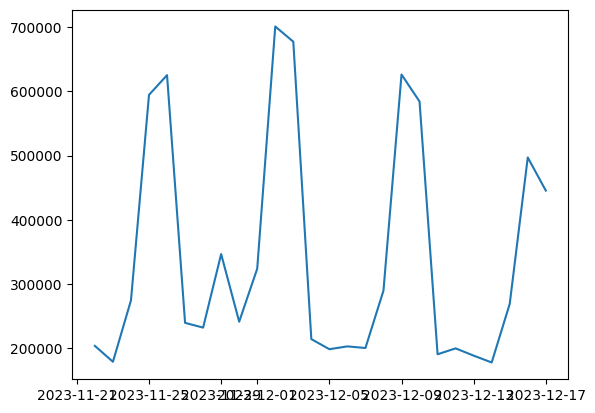

In [49]:
plt.plot(temp["targetDt"], temp["audiCnt"])